<a href="https://colab.research.google.com/github/rathika0706/Netflix_DataExploration_and_Visualisation_using_Python/blob/main/Netflix_Data_exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Netflix- Data Exploration and Visualisation**


1.Importing the required python libraries for data analysis and visualisation

In [156]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

2.Loading the dataset(netflix) for exploration.

In [157]:
df=pd.read_csv("netflix.csv")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [158]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [159]:
df["rating"].value_counts()

TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: rating, dtype: int64

# **Data Cleaning**

  We observe that there are nested information in ceratin columns like "cast", "director", "listed in", "country". It has to be unnested, so that better analysis can be done over it to extract insghts.
  These four columns are splitted based on comma as delimiter using split() function.

In [160]:
unstacked1=df["cast"].apply(lambda x:str(x).split(",")).tolist()
unstacked2=df["country"].apply(lambda x:str(x).split(",")).tolist()
unstacked3=df["director"].apply(lambda x:str(x).split(",")).tolist()
unstacked4=df["listed_in"].apply(lambda x:str(x).split(",")).tolist()

In [161]:
df_cast=pd.DataFrame(unstacked1,index=df["title"])
df_cast

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
title,,,,,,,,,,,,,,,,,,,,,
Dick Johnson Is Dead,nan,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
Blood & Water,Ama Qamata,Khosi Ngema,Gail Mabalane,Thabang Molaba,Dillon Windvogel,Natasha Thahane,Arno Greeff,Xolile Tshabalala,Getmore Sithole,Cindy Mahlangu,...,None,None,None,None,None,None,None,None,None,None
Ganglands,Sami Bouajila,Tracy Gotoas,Samuel Jouy,Nabiha Akkari,Sofia Lesaffre,Salim Kechiouche,Noureddine Farihi,Geert Van Rampelberg,Bakary Diombera,None,...,None,None,None,None,None,None,None,None,None,None
Jailbirds New Orleans,nan,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
Kota Factory,Mayur More,Jitendra Kumar,Ranjan Raj,Alam Khan,Ahsaas Channa,Revathi Pillai,Urvi Singh,Arun Kumar,None,None,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zodiac,Mark Ruffalo,Jake Gyllenhaal,Robert Downey Jr.,Anthony Edwards,Brian Cox,Elias Koteas,Donal Logue,John Carroll Lynch,Dermot Mulroney,Chloë Sevigny,...,None,None,None,None,None,None,None,None,None,None
Zombie Dumb,nan,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
Zombieland,Jesse Eisenberg,Woody Harrelson,Emma Stone,Abigail Breslin,Amber Heard,Bill Murray,Derek Graf,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [162]:
df_cast=df_cast.stack()
df_cast

title                  
Dick Johnson Is Dead  0                       nan
Blood & Water         0                Ama Qamata
                      1               Khosi Ngema
                      2             Gail Mabalane
                      3            Thabang Molaba
                                    ...          
Zubaan                3          Manish Chaudhary
                      4              Meghna Malik
                      5             Malkeet Rauni
                      6            Anita Shabdish
                      7     Chittaranjan Tripathy
Length: 64951, dtype: object

In [163]:
df_cast=pd.DataFrame(df_cast)
df_cast.reset_index(inplace=True)
df_cast=df_cast[["title",0]]
df_cast

,title,0
0,Dick Johnson Is Dead,nan
1,Blood & Water,Ama Qamata
2,Blood & Water,Khosi Ngema
3,Blood & Water,Gail Mabalane
4,Blood & Water,Thabang Molaba
...,...,...
64946,Zubaan,Manish Chaudhary
64947,Zubaan,Meghna Malik
64948,Zubaan,Malkeet Rauni
64949,Zubaan,Anita Shabdish


In [164]:
df_cast.columns=["title","cast"]
df_cast

,title,cast
0,Dick Johnson Is Dead,nan
1,Blood & Water,Ama Qamata
2,Blood & Water,Khosi Ngema
3,Blood & Water,Gail Mabalane
4,Blood & Water,Thabang Molaba
...,...,...
64946,Zubaan,Manish Chaudhary
64947,Zubaan,Meghna Malik
64948,Zubaan,Malkeet Rauni
64949,Zubaan,Anita Shabdish


In [165]:
df_country=pd.DataFrame(unstacked2,index=df["title"])
df_country=df_country.stack()
df_country=pd.DataFrame(df_country)
df_country.reset_index(inplace=True)
df_country=df_country[["title",0]]
df_country.columns=["title","country"]
df_country

,title,country
0,Dick Johnson Is Dead,United States
1,Blood & Water,South Africa
2,Ganglands,nan
3,Jailbirds New Orleans,nan
4,Kota Factory,India
...,...,...
10845,Zodiac,United States
10846,Zombie Dumb,nan
10847,Zombieland,United States
10848,Zoom,United States


In [166]:
df_director=pd.DataFrame(unstacked3,index=df["title"])
df_director=df_director.stack()
df_director=pd.DataFrame(df_director)
df_director.reset_index(inplace=True)
df_director=df_director[["title",0]]
df_director.columns=["title","director"]
df_director

,title,director
0,Dick Johnson Is Dead,Kirsten Johnson
1,Blood & Water,nan
2,Ganglands,Julien Leclercq
3,Jailbirds New Orleans,nan
4,Kota Factory,nan
...,...,...
9607,Zodiac,David Fincher
9608,Zombie Dumb,nan
9609,Zombieland,Ruben Fleischer
9610,Zoom,Peter Hewitt


In [167]:
df_listed_in=pd.DataFrame(unstacked4,index=df["title"])
df_listed_in=df_listed_in.stack()
df_listed_in=pd.DataFrame(df_listed_in)
df_listed_in.reset_index(inplace=True)
df_listed_in=df_listed_in[['title',0]]
df_listed_in.columns=['title','listed_in']
df_listed_in

,title,listed_in
0,Dick Johnson Is Dead,Documentaries
1,Blood & Water,International TV Shows
2,Blood & Water,TV Dramas
3,Blood & Water,TV Mysteries
4,Ganglands,Crime TV Shows
...,...,...
19318,Zoom,Children & Family Movies
19319,Zoom,Comedies
19320,Zubaan,Dramas
19321,Zubaan,International Movies


Unnested columns are merged with original dataframe using merge() function which helps in data manipulation.

In [168]:
merge1=df_cast.merge(df_director,on="title",how="inner")
merge1

,title,cast,director
0,Dick Johnson Is Dead,nan,Kirsten Johnson
1,Blood & Water,Ama Qamata,nan
2,Blood & Water,Khosi Ngema,nan
3,Blood & Water,Gail Mabalane,nan
4,Blood & Water,Thabang Molaba,nan
...,...,...,...
70807,Zubaan,Manish Chaudhary,Mozez Singh
70808,Zubaan,Meghna Malik,Mozez Singh
70809,Zubaan,Malkeet Rauni,Mozez Singh
70810,Zubaan,Anita Shabdish,Mozez Singh


In [169]:
merge2=merge1.merge(df_listed_in, on="title",how="inner")
merge2

,title,cast,director,listed_in
0,Dick Johnson Is Dead,nan,Kirsten Johnson,Documentaries
1,Blood & Water,Ama Qamata,nan,International TV Shows
2,Blood & Water,Ama Qamata,nan,TV Dramas
3,Blood & Water,Ama Qamata,nan,TV Mysteries
4,Blood & Water,Khosi Ngema,nan,International TV Shows
...,...,...,...,...
161211,Zubaan,Anita Shabdish,Mozez Singh,International Movies
161212,Zubaan,Anita Shabdish,Mozez Singh,Music & Musicals
161213,Zubaan,Chittaranjan Tripathy,Mozez Singh,Dramas
161214,Zubaan,Chittaranjan Tripathy,Mozez Singh,International Movies


In [170]:
merge3=merge2.merge(df_country,on="title",how="inner")
merge3

,title,cast,director,listed_in,country
0,Dick Johnson Is Dead,nan,Kirsten Johnson,Documentaries,United States
1,Blood & Water,Ama Qamata,nan,International TV Shows,South Africa
2,Blood & Water,Ama Qamata,nan,TV Dramas,South Africa
3,Blood & Water,Ama Qamata,nan,TV Mysteries,South Africa
4,Blood & Water,Khosi Ngema,nan,International TV Shows,South Africa
...,...,...,...,...,...
202060,Zubaan,Anita Shabdish,Mozez Singh,International Movies,India
202061,Zubaan,Anita Shabdish,Mozez Singh,Music & Musicals,India
202062,Zubaan,Chittaranjan Tripathy,Mozez Singh,Dramas,India
202063,Zubaan,Chittaranjan Tripathy,Mozez Singh,International Movies,India


In [171]:
final_df=merge3.merge(df,on="title",how="inner")
final_df.drop(columns=["cast_y","director_y","listed_in_y","country_y"],axis=1,inplace=True)
final_df

,title,cast_x,director_x,listed_in_x,country_x,show_id,type,date_added,release_year,rating,duration,description
0,Dick Johnson Is Dead,nan,Kirsten Johnson,Documentaries,United States,s1,Movie,"September 25, 2021",2020,PG-13,90 min,"As her father nears the end of his life, filmm..."
1,Blood & Water,Ama Qamata,nan,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t..."
2,Blood & Water,Ama Qamata,nan,TV Dramas,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t..."
3,Blood & Water,Ama Qamata,nan,TV Mysteries,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t..."
4,Blood & Water,Khosi Ngema,nan,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t..."
...,...,...,...,...,...,...,...,...,...,...,...,...
202060,Zubaan,Anita Shabdish,Mozez Singh,International Movies,India,s8807,Movie,"March 2, 2019",2015,TV-14,111 min,A scrappy but poor boy worms his way into a ty...
202061,Zubaan,Anita Shabdish,Mozez Singh,Music & Musicals,India,s8807,Movie,"March 2, 2019",2015,TV-14,111 min,A scrappy but poor boy worms his way into a ty...
202062,Zubaan,Chittaranjan Tripathy,Mozez Singh,Dramas,India,s8807,Movie,"March 2, 2019",2015,TV-14,111 min,A scrappy but poor boy worms his way into a ty...
202063,Zubaan,Chittaranjan Tripathy,Mozez Singh,International Movies,India,s8807,Movie,"March 2, 2019",2015,TV-14,111 min,A scrappy but poor boy worms his way into a ty...


Handling the missing values
    

   Missing values in the dataset are handled using imputations. Since we find most of our data to be non-quantitaive in nature,we use mode to fill missing values of "country" column. In case of "cast" and "director", missing values are replaced with "no cast" and "no director".

In [172]:
(final_df["cast_x"]=="nan").value_counts()
#counts the number of missing values in cast coulmn--True indicates number of nan


False    199916
True       2149
Name: cast_x, dtype: int64

In [173]:
final_df["cast_x"].replace("nan","No cast",inplace=True)

In [174]:
(final_df["listed_in_x"]=="nan").value_counts()
#There are no missing values in listed_in column


False    202065
Name: listed_in_x, dtype: int64

In [175]:
(final_df["director_x"]=="nan").value_counts()

False    151422
True      50643
Name: director_x, dtype: int64

In [176]:
final_df["director_x"].replace("nan","No director",inplace=True)

In [177]:
(final_df["country_x"]=="nan").value_counts()

False    190168
True      11897
Name: country_x, dtype: int64

In [178]:
country_mode=final_df["country_x"].mode()
country_mode

0    United States
Name: country_x, dtype: object

In [179]:
final_df["country_x"].replace("nan",country_mode[0],inplace=True)

In [180]:
final_df

,title,cast_x,director_x,listed_in_x,country_x,show_id,type,date_added,release_year,rating,duration,description
0,Dick Johnson Is Dead,No cast,Kirsten Johnson,Documentaries,United States,s1,Movie,"September 25, 2021",2020,PG-13,90 min,"As her father nears the end of his life, filmm..."
1,Blood & Water,Ama Qamata,No director,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t..."
2,Blood & Water,Ama Qamata,No director,TV Dramas,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t..."
3,Blood & Water,Ama Qamata,No director,TV Mysteries,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t..."
4,Blood & Water,Khosi Ngema,No director,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t..."
...,...,...,...,...,...,...,...,...,...,...,...,...
202060,Zubaan,Anita Shabdish,Mozez Singh,International Movies,India,s8807,Movie,"March 2, 2019",2015,TV-14,111 min,A scrappy but poor boy worms his way into a ty...
202061,Zubaan,Anita Shabdish,Mozez Singh,Music & Musicals,India,s8807,Movie,"March 2, 2019",2015,TV-14,111 min,A scrappy but poor boy worms his way into a ty...
202062,Zubaan,Chittaranjan Tripathy,Mozez Singh,Dramas,India,s8807,Movie,"March 2, 2019",2015,TV-14,111 min,A scrappy but poor boy worms his way into a ty...
202063,Zubaan,Chittaranjan Tripathy,Mozez Singh,International Movies,India,s8807,Movie,"March 2, 2019",2015,TV-14,111 min,A scrappy but poor boy worms his way into a ty...


In [181]:
final_df["rating"].value_counts()

TV-MA       73915
TV-14       43957
R           25860
PG-13       16246
TV-PG       14926
PG          10919
TV-Y7        6304
TV-Y         3665
TV-G         2779
NR           1573
G            1530
NC-17         149
TV-Y7-FV       86
UR             86
74 min          1
84 min          1
66 min          1
Name: rating, dtype: int64

From the above output we observe that unrecognized values are found in "rating" coulmn such as 74min, 84min, 66min.

In [182]:
mask=final_df["duration"].isna()
final_df[mask]

,title,cast_x,director_x,listed_in_x,country_x,show_id,type,date_added,release_year,rating,duration,description
126582,Louis C.K. 2017,Louis C.K.,Louis C.K.,Movies,United States,s5542,Movie,"April 4, 2017",2017,74 min,NaN,"Louis C.K. muses on religion, eternal love, gi..."
131648,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,Movies,United States,s5795,Movie,"September 16, 2016",2010,84 min,NaN,Emmy-winning comedy writer Louis C.K. brings h...
131782,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,Movies,United States,s5814,Movie,"August 15, 2016",2015,66 min,NaN,The comic puts his trademark hilarious/thought...


In the above result, we observe that rating coulmns have values 74min, 84min, 66min and duration columns have nan. We observe that, this might have occured due to misentry. Above output helped us to extract the rows and it can be further reassigned to duration column.

In [183]:
final_df.loc[126582,"duration"]=final_df.loc[126582,"rating"]
final_df.loc[131648,"duration"]=final_df.loc[131648,"rating"]
final_df.loc[131782,"duration"]=final_df.loc[131782,"rating"]

In [184]:
final_df.loc[126582,"rating"]=np.nan
final_df.loc[131648,"rating"]=np.nan
final_df.loc[131782,"rating"]=np.nan

In [185]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 202065 entries, 0 to 202064
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   title         202065 non-null  object
 1   cast_x        202065 non-null  object
 2   director_x    202065 non-null  object
 3   listed_in_x   202065 non-null  object
 4   country_x     202065 non-null  object
 5   show_id       202065 non-null  object
 6   type          202065 non-null  object
 7   date_added    201907 non-null  object
 8   release_year  202065 non-null  int64 
 9   rating        201995 non-null  object
 10  duration      202065 non-null  object
 11  description   202065 non-null  object
dtypes: int64(1), object(11)
memory usage: 28.1+ MB


In [186]:
final_df.isna().sum()

title             0
cast_x            0
director_x        0
listed_in_x       0
country_x         0
show_id           0
type              0
date_added      158
release_year      0
rating           70
duration          0
description       0
dtype: int64

Handling the missing values in rating column using mode.

In [187]:
movie_rating=final_df.loc[final_df["type"]=="Movie","rating"].mode()[0]
movie_rating

'TV-MA'

In [188]:
TV_rating=final_df.loc[final_df["type"]=="TV Show","rating"].mode()[0]
TV_rating

'TV-MA'

In [189]:
final_df["rating"]=final_df.apply(lambda x: movie_rating if x["type"]=="Movie"
                                 and pd.isna(x["rating"]) else TV_rating if x["type"]=="TV Show"
                                 and pd.isna(x["rating"]) else x["rating"],axis=1)

In [190]:
final_df.isna().sum()

title             0
cast_x            0
director_x        0
listed_in_x       0
country_x         0
show_id           0
type              0
date_added      158
release_year      0
rating            0
duration          0
description       0
dtype: int64

Missing values in date_added column are filled with zeros as further imputations cannot be done.

In [191]:
final_df["date_added"].fillna(0,inplace=True)

In [192]:
final_df.isna().sum()

title           0
cast_x          0
director_x      0
listed_in_x     0
country_x       0
show_id         0
type            0
date_added      0
release_year    0
rating          0
duration        0
description     0
dtype: int64

In [193]:
final_df.loc[final_df.duplicated()]

,title,cast_x,director_x,listed_in_x,country_x,show_id,type,date_added,release_year,rating,duration,description
39354,Rust Creek,Micah Hauptman,Jen McGowan,Thrillers,United States,s1632,Movie,"November 30, 2020",2018,R,108 min,A wrong turn in the woods becomes a fight for ...
135656,300 Miles to Heaven,Adrianna Biedrzyńska,Maciej Dejczer,Dramas,Denmark,s6014,Movie,"October 1, 2019",1989,TV-14,93 min,"Hoping to help their dissident parents, two br..."
135657,300 Miles to Heaven,Adrianna Biedrzyńska,Maciej Dejczer,Dramas,France,s6014,Movie,"October 1, 2019",1989,TV-14,93 min,"Hoping to help their dissident parents, two br..."
135658,300 Miles to Heaven,Adrianna Biedrzyńska,Maciej Dejczer,Dramas,Poland,s6014,Movie,"October 1, 2019",1989,TV-14,93 min,"Hoping to help their dissident parents, two br..."
135659,300 Miles to Heaven,Adrianna Biedrzyńska,Maciej Dejczer,International Movies,Denmark,s6014,Movie,"October 1, 2019",1989,TV-14,93 min,"Hoping to help their dissident parents, two br..."
135660,300 Miles to Heaven,Adrianna Biedrzyńska,Maciej Dejczer,International Movies,France,s6014,Movie,"October 1, 2019",1989,TV-14,93 min,"Hoping to help their dissident parents, two br..."
135661,300 Miles to Heaven,Adrianna Biedrzyńska,Maciej Dejczer,International Movies,Poland,s6014,Movie,"October 1, 2019",1989,TV-14,93 min,"Hoping to help their dissident parents, two br..."


In [194]:
final_df.drop_duplicates(keep="first")

,title,cast_x,director_x,listed_in_x,country_x,show_id,type,date_added,release_year,rating,duration,description
0,Dick Johnson Is Dead,No cast,Kirsten Johnson,Documentaries,United States,s1,Movie,"September 25, 2021",2020,PG-13,90 min,"As her father nears the end of his life, filmm..."
1,Blood & Water,Ama Qamata,No director,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t..."
2,Blood & Water,Ama Qamata,No director,TV Dramas,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t..."
3,Blood & Water,Ama Qamata,No director,TV Mysteries,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t..."
4,Blood & Water,Khosi Ngema,No director,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t..."
...,...,...,...,...,...,...,...,...,...,...,...,...
202060,Zubaan,Anita Shabdish,Mozez Singh,International Movies,India,s8807,Movie,"March 2, 2019",2015,TV-14,111 min,A scrappy but poor boy worms his way into a ty...
202061,Zubaan,Anita Shabdish,Mozez Singh,Music & Musicals,India,s8807,Movie,"March 2, 2019",2015,TV-14,111 min,A scrappy but poor boy worms his way into a ty...
202062,Zubaan,Chittaranjan Tripathy,Mozez Singh,Dramas,India,s8807,Movie,"March 2, 2019",2015,TV-14,111 min,A scrappy but poor boy worms his way into a ty...
202063,Zubaan,Chittaranjan Tripathy,Mozez Singh,International Movies,India,s8807,Movie,"March 2, 2019",2015,TV-14,111 min,A scrappy but poor boy worms his way into a ty...


Converting date_added column to datetime format and extracting date, month, year for analysis.


In [195]:
final_df["date_added"]=pd.to_datetime(final_df["date_added"])
final_df["year_added"]=final_df["date_added"].dt.year
final_df["month_added"]=final_df["date_added"].dt.month
final_df["month_name_added"]=final_df["date_added"].dt.month_name()
final_df["week_added"]=final_df["date_added"].dt.isocalendar().week

In [196]:
final_df.rename(columns={"cast_x": "cast",
                            "director_x":"director",
                            "listed_in_x":"genre",
                            "country_x":"country"},inplace=True)

In [197]:
final_df['rating'] = final_df['rating'].str.strip()
final_df['country'] = final_df['country'].str.strip()
final_df['director'] = final_df['director'].str.strip()
final_df['cast'] = final_df['cast'].str.strip()
final_df['genre'] = final_df['genre'].str.strip()
#to remove whitespaces

In [198]:
final_df

,title,cast,director,genre,country,show_id,type,date_added,release_year,rating,duration,description,year_added,month_added,month_name_added,week_added
0,Dick Johnson Is Dead,No cast,Kirsten Johnson,Documentaries,United States,s1,Movie,2021-09-25,2020,PG-13,90 min,"As her father nears the end of his life, filmm...",2021,9,September,38
1,Blood & Water,Ama Qamata,No director,International TV Shows,South Africa,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",2021,9,September,38
2,Blood & Water,Ama Qamata,No director,TV Dramas,South Africa,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",2021,9,September,38
3,Blood & Water,Ama Qamata,No director,TV Mysteries,South Africa,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",2021,9,September,38
4,Blood & Water,Khosi Ngema,No director,International TV Shows,South Africa,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",2021,9,September,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202060,Zubaan,Anita Shabdish,Mozez Singh,International Movies,India,s8807,Movie,2019-03-02,2015,TV-14,111 min,A scrappy but poor boy worms his way into a ty...,2019,3,March,9
202061,Zubaan,Anita Shabdish,Mozez Singh,Music & Musicals,India,s8807,Movie,2019-03-02,2015,TV-14,111 min,A scrappy but poor boy worms his way into a ty...,2019,3,March,9
202062,Zubaan,Chittaranjan Tripathy,Mozez Singh,Dramas,India,s8807,Movie,2019-03-02,2015,TV-14,111 min,A scrappy but poor boy worms his way into a ty...,2019,3,March,9
202063,Zubaan,Chittaranjan Tripathy,Mozez Singh,International Movies,India,s8807,Movie,2019-03-02,2015,TV-14,111 min,A scrappy but poor boy worms his way into a ty...,2019,3,March,9


In [199]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 202065 entries, 0 to 202064
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   title             202065 non-null  object        
 1   cast              202065 non-null  object        
 2   director          202065 non-null  object        
 3   genre             202065 non-null  object        
 4   country           202065 non-null  object        
 5   show_id           202065 non-null  object        
 6   type              202065 non-null  object        
 7   date_added        202065 non-null  datetime64[ns]
 8   release_year      202065 non-null  int64         
 9   rating            202065 non-null  object        
 10  duration          202065 non-null  object        
 11  description       202065 non-null  object        
 12  year_added        202065 non-null  int64         
 13  month_added       202065 non-null  int64         
 14  mont

# Exploratory Data Analysis


Lets find out the number of unique values in each column for better analysis using nunique()

In [200]:
final_df["rating"].nunique()

14

In [201]:
final_df["genre"].nunique()

42

In [202]:
final_df["director"].nunique()

4994

In [203]:
final_df["country"].nunique()

123

In [204]:
final_df["cast"].nunique()

36440

In [205]:
final_df["title"].nunique()

8807

1.Distribution of content type in Netflix library
   

In [206]:
x=final_df.groupby(["type"])["type"].count()
y=len(final_df)
percentage=((x/y)*100).round(2)
df_type=pd.DataFrame(percentage)
df_type.rename({"type":"percentage"},axis=1,inplace=True)
df_type

,percentage
type,
Movie,72.21
TV Show,27.79


Visualizing the distribution in a pieplot

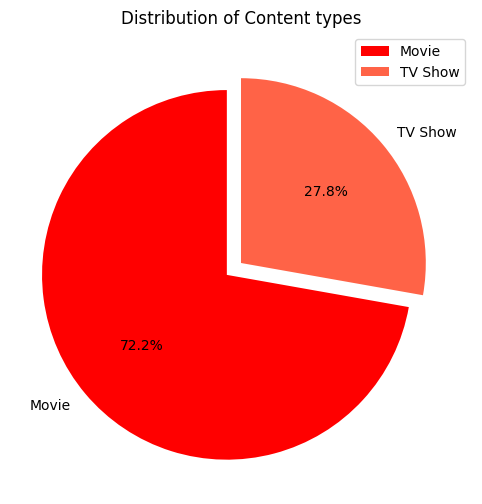

In [207]:
plt.figure(figsize=(10,6))
plt.pie(df_type["percentage"],labels=df_type.index,colors=("r","tomato"),explode=(0.1,0),
        autopct='%1.1f%%',startangle=90)
plt.legend(loc="upper right")
plt.title("Distribution of Content types")
plt.show()


2.Count and Visualisation of Categorical Variables

In [208]:
x

type
Movie      145917
TV Show     56148
Name: type, dtype: int64

Text(0.5, 1.0, 'Count of Content Types')

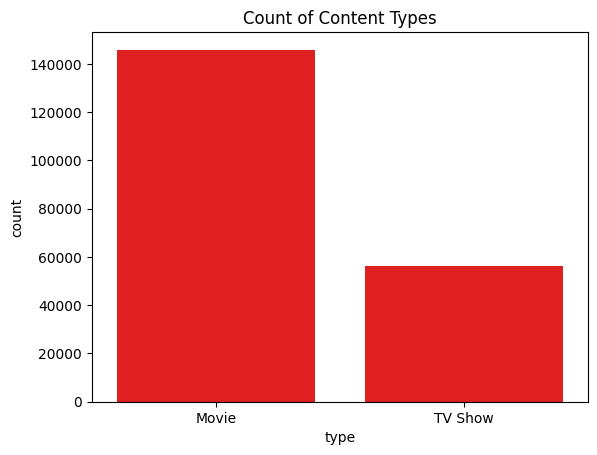

In [209]:
sns.countplot(x="type",data=final_df,color="r")
plt.xlabel("type")
plt.ylabel("count")
plt.title("Count of Content Types")

In [210]:
final_df["rating"].value_counts()

TV-MA       73985
TV-14       43957
R           25860
PG-13       16246
TV-PG       14926
PG          10919
TV-Y7        6304
TV-Y         3665
TV-G         2779
NR           1573
G            1530
NC-17         149
TV-Y7-FV       86
UR             86
Name: rating, dtype: int64

<ipython-input-211-c93a62cb1608>:2: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:r'` for the same effect.

  sns.countplot(x="rating",data=final_df,hue="type",order=final_df["rating"].value_counts().index,


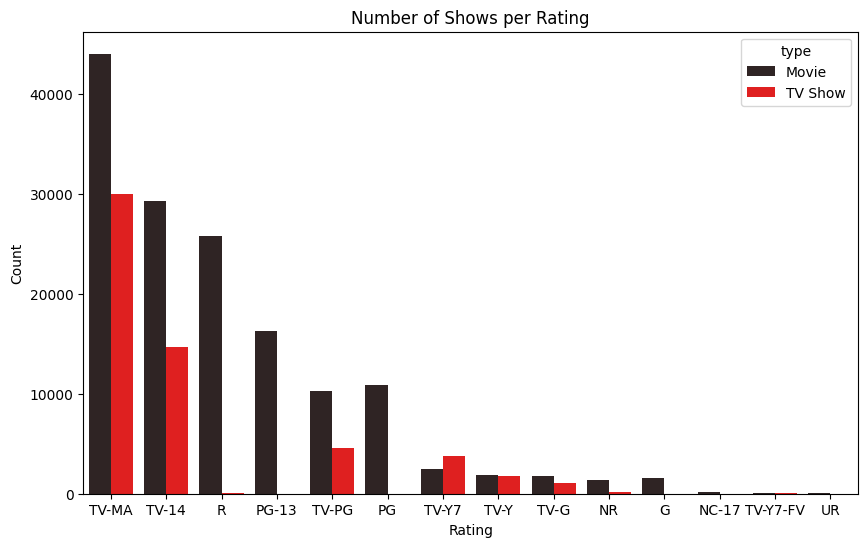

In [211]:
plt.figure(figsize=(10,6))
sns.countplot(x="rating",data=final_df,hue="type",order=final_df["rating"].value_counts().index,
               color="r")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.title("Number of Shows per Rating")
plt.show()


In [212]:
country_count=final_df["country"].value_counts()
top_10_countries=country_count.head(10)
top_10_countries

United States     71247
India             22814
United Kingdom    12965
Japan              8679
France             8254
Canada             7915
Spain              5315
South Korea        5043
Germany            4383
Mexico             3941
Name: country, dtype: int64

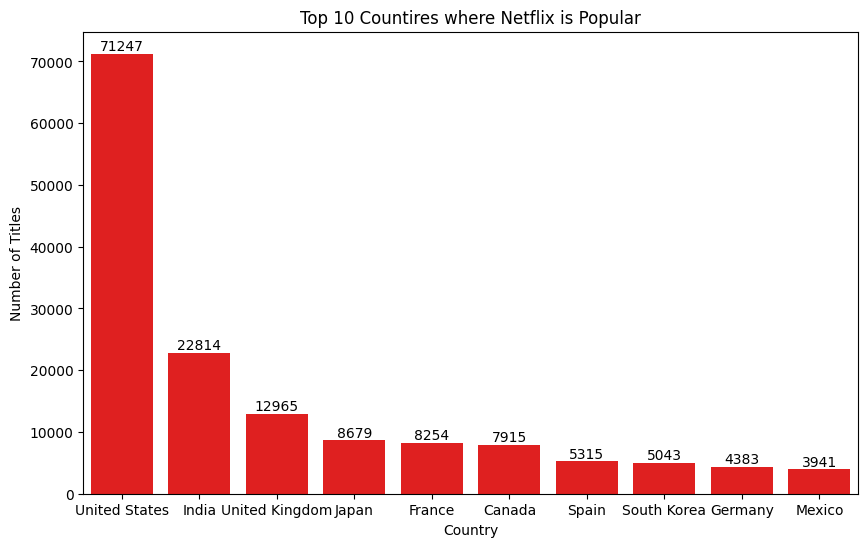

In [213]:
plt.figure(figsize=(10,6))
bar_plot=sns.barplot(x=top_10_countries.index,y=top_10_countries.values,
            color="red")
for index, value in enumerate(top_10_countries.values):
    bar_plot.text(index, value, str(value), ha='center', va='bottom')
plt.xlabel("Country")
plt.ylabel("Number of Titles")
plt.title("Top 10 Countires where Netflix is Popular")
plt.show()

In [214]:
director_count=final_df["director"].value_counts()[1:]
top_5_directors=director_count.head()
top_5_directors

Martin Scorsese        419
Youssef Chahine        409
Cathy Garcia-Molina    356
Steven Spielberg       355
Lars von Trier         336
Name: director, dtype: int64

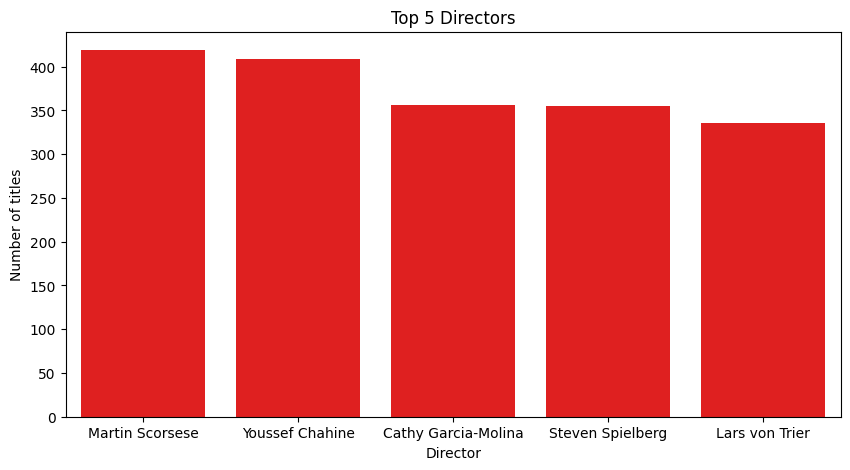

In [215]:
plt.figure(figsize=(10,5))
sns.barplot(x=top_5_directors.index,y=top_5_directors.values,color="red")
plt.xlabel("Director")
plt.ylabel("Number of titles")
plt.title("Top 5 Directors")
plt.show()


In [216]:
genre_count=final_df["genre"].value_counts()
top_10_genre=genre_count.head(10)
top_10_genre

Dramas                      29806
International Movies        28243
Comedies                    20829
International TV Shows      12845
Action & Adventure          12216
Independent Movies           9834
Children & Family Movies     9771
TV Dramas                    8942
Thrillers                    7107
Romantic Movies              6412
Name: genre, dtype: int64

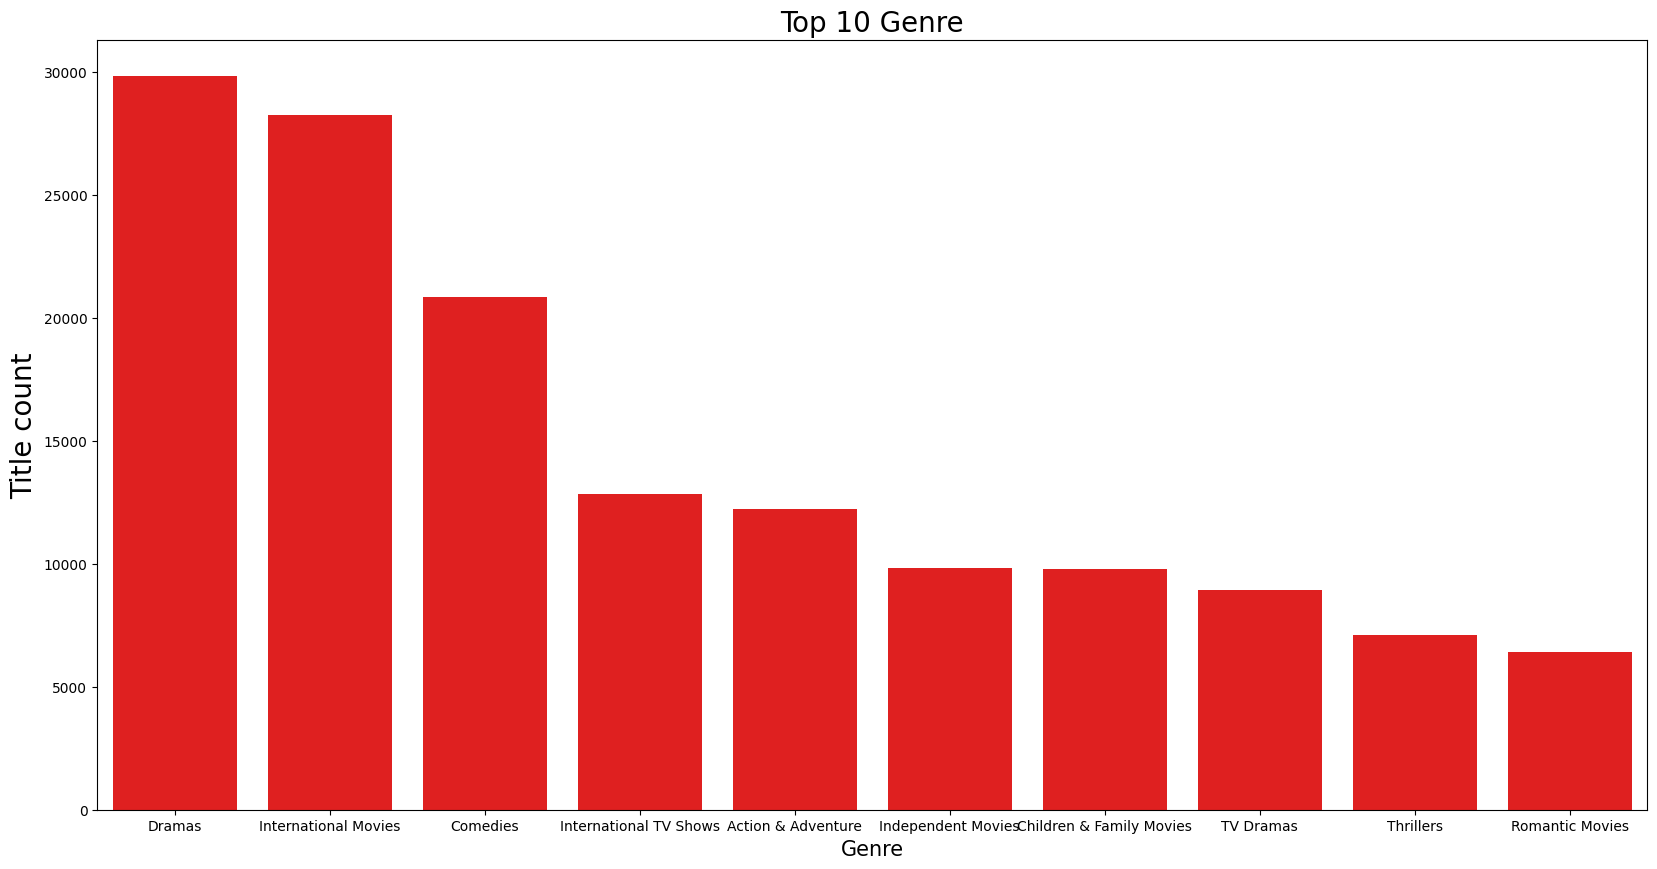

In [217]:
plt.figure(figsize=(20,10))
sns.barplot(x=top_10_genre.index,y=top_10_genre.values,color="red")
plt.xlabel("Genre",fontsize=15)
plt.ylabel("Title count",fontsize=20)
plt.title("Top 10 Genre",fontsize=20)
plt.show()

In [218]:
cast_count=final_df["cast"].value_counts()[1:]
top_10_cast=cast_count.head(10)
top_10_cast

Liam Neeson         161
Alfred Molina       160
John Krasinski      139
Salma Hayek         130
Frank Langella      128
Anupam Kher         127
John Rhys-Davies    125
Shah Rukh Khan      108
Naseeruddin Shah    106
Radhika Apte        104
Name: cast, dtype: int64

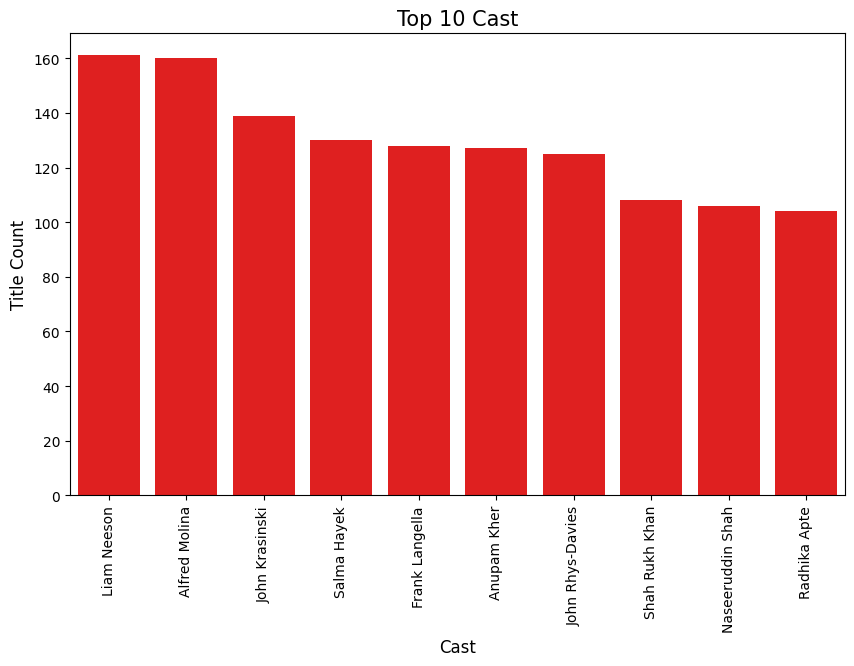

In [219]:
plt.figure(figsize=(10,6))
plt.xticks(rotation=90)
sns.barplot(x=top_10_cast.index,y=top_10_cast.values,color="red")
plt.xlabel("Cast",fontsize=12)
plt.ylabel("Title Count",fontsize=12)
plt.title("Top 10 Cast",fontsize=15)
plt.show()

   The above analysis helps us to conclude that "movie" content type dominated netflix library compared to "TV Shows". We also obseve that most of the content is released in "United States", and then "India". Data visualization also helped us to get top 10 "cast","directors","genre" which helped us to understand about audience reception. Producing more of those content will help Netflix to retain its subscribers.

3.Comparison of TV shows and Movies analysis

In [220]:
Movie=final_df.loc[final_df["type"]=="Movie"]
Popular_Country=Movie.groupby(["country"])["title"].nunique().sort_values(ascending=False)[:11]

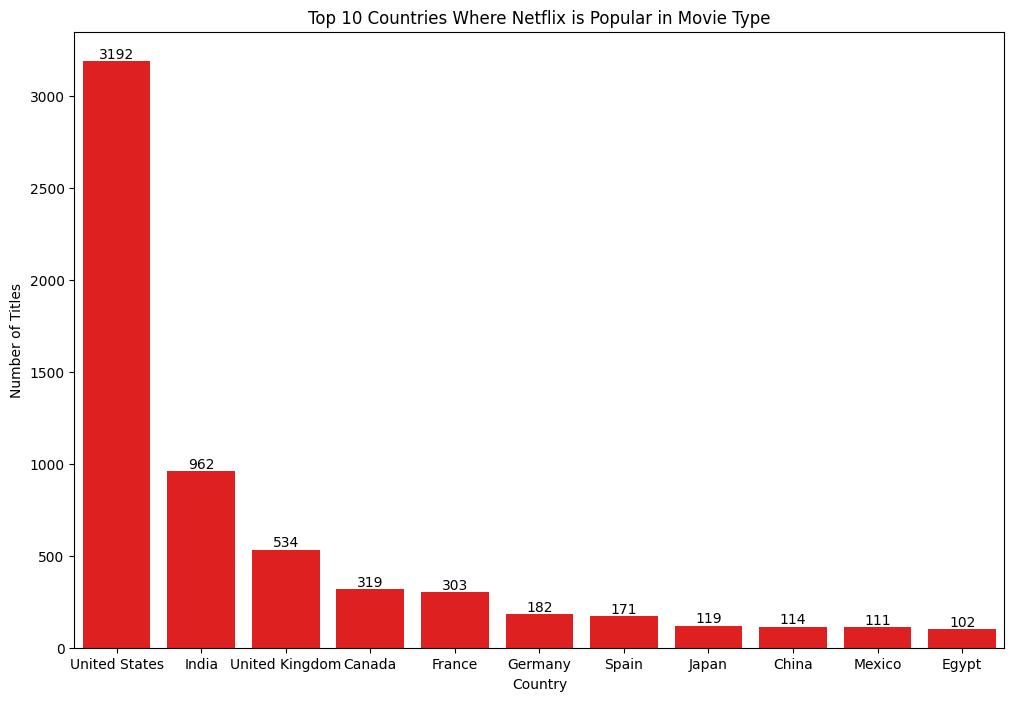

In [221]:
plt.figure(figsize=(12, 8))
bar_plot_y=sns.barplot(x=Popular_Country.index, y=Popular_Country.values,color="red")
plt.xlabel('Country')
plt.ylabel('Number of Titles')
plt.title('Top 10 Countries Where Netflix is Popular in Movie Type')
for index, value in enumerate(Popular_Country.values):
  bar_plot_y.text(index, value, str(value), ha='center', va='bottom')
plt.show()

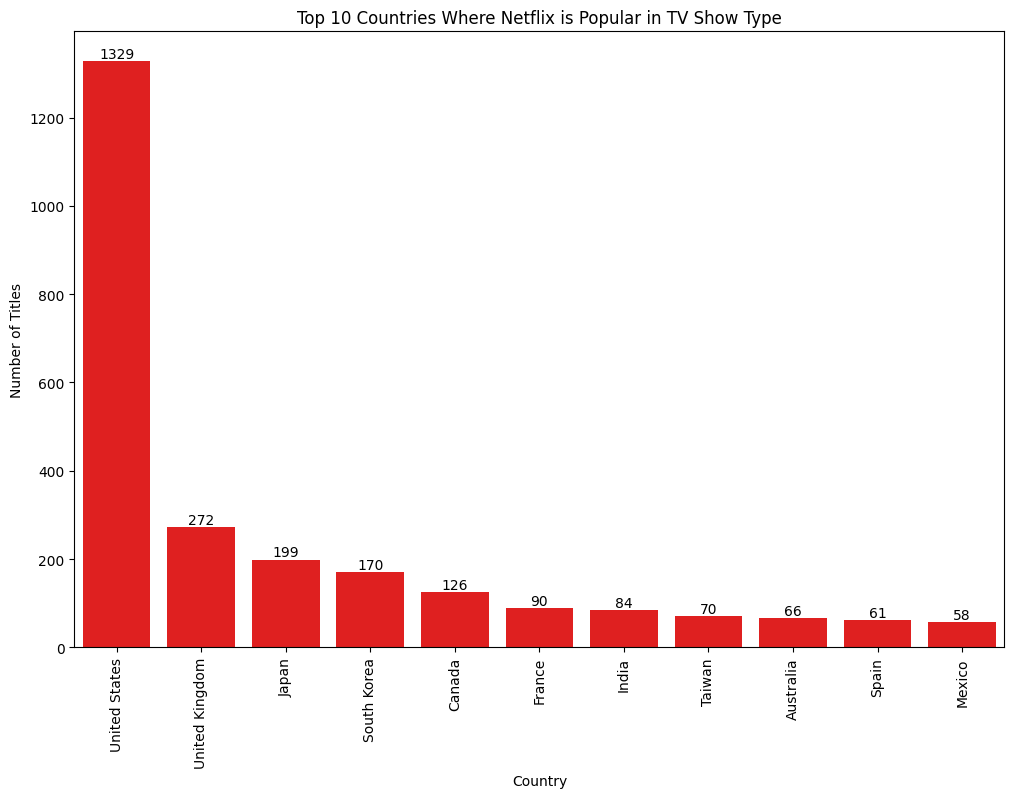

In [222]:
TV_show=final_df.loc[final_df["type"]=="TV Show"]
popular_countries=TV_show.groupby(["country"])["title"].nunique().sort_values(ascending=False)[:11]
plt.figure(figsize=(12, 8))
bar_plot_h=sns.barplot(x=popular_countries.index, y=popular_countries.values,color="red")
plt.xlabel('Country')
plt.ylabel('Number of Titles')
plt.xticks(rotation=90)
plt.title('Top 10 Countries Where Netflix is Popular in TV Show Type')
for index, value in enumerate(popular_countries.values):
  bar_plot_h.text(index, value, str(value), ha='center', va='bottom')
plt.show()

From the above analysis, it helps us to better understand what type of content to be released in each country to retain the subscribers.In case of United states both movies and TV shows are at the top.

4.Best time to launch Movie/TV show

In [223]:
Best_week_Movie=Movie.groupby(["week_added"])["title"].nunique().sort_values(ascending=False)[:1]
Best_week_Movie

week_added
1    316
Name: title, dtype: int64

In [224]:
Best_week_Tvshow=TV_show.groupby(["week_added"])["title"].nunique().sort_values(ascending=False)[:1]
Best_week_Tvshow

week_added
27    86
Name: title, dtype: int64

Above result shows that best week to launch Movie is week 1 and Tv show is week 27

In [225]:
Best_month_Movie=Movie.groupby(["month_name_added"])["title"].nunique().sort_values(ascending=False)
Best_month_Movie


month_name_added
July         565
April        550
December     547
January      546
October      545
March        529
August       519
September    519
November     498
June         492
May          439
February     382
Name: title, dtype: int64

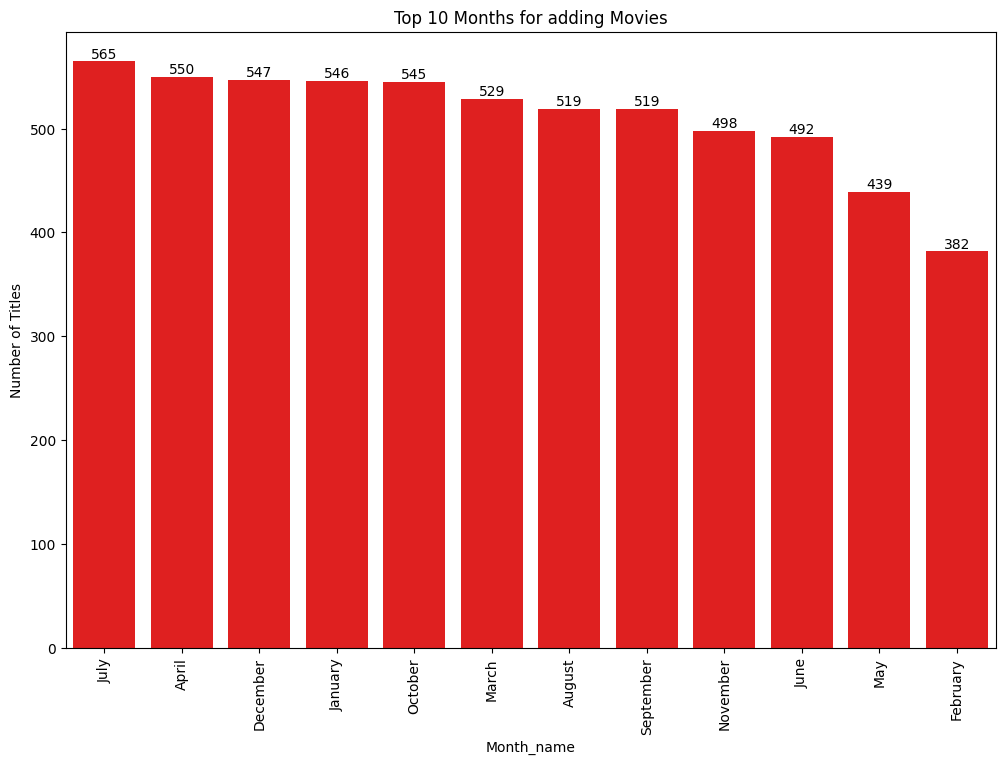

In [226]:
plt.figure(figsize=(12, 8))
bar_plot_h=sns.barplot(x=Best_month_Movie.index, y=Best_month_Movie.values,color="red")
plt.xlabel('Month_name')
plt.ylabel('Number of Titles')
plt.xticks(rotation=90)
plt.title('Top 10 Months for adding Movies')
for index, value in enumerate(Best_month_Movie.values):
  bar_plot_h.text(index, value, str(value), ha='center', va='bottom')
plt.show()

In [227]:
Best_month_Tvshow=TV_show.groupby(["month_name_added"])["title"].nunique().sort_values(ascending=False)
Best_month_Tvshow

month_name_added
December     266
July         262
September    251
August       236
June         236
October      215
April        214
March        213
November     207
January      202
May          193
February     181
Name: title, dtype: int64

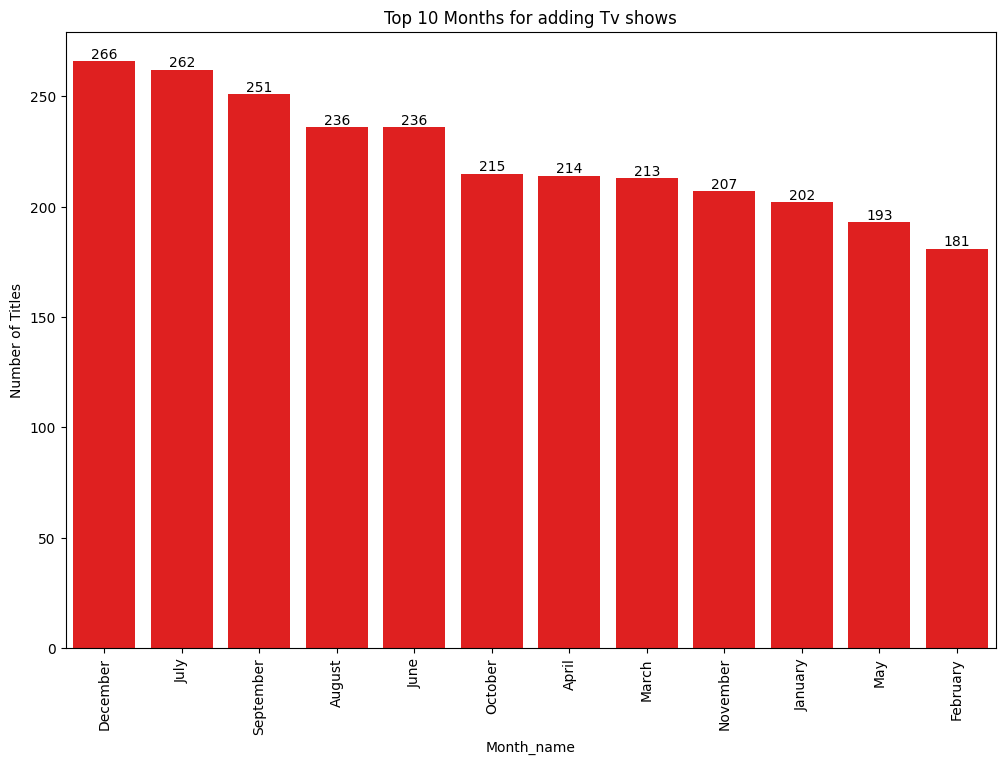

In [228]:
plt.figure(figsize=(12, 8))
bar_plot_h=sns.barplot(x=Best_month_Tvshow.index, y=Best_month_Tvshow.values,color="red")
plt.xlabel('Month_name')
plt.ylabel('Number of Titles')
plt.xticks(rotation=90)
plt.title('Top 10 Months for adding Tv shows')
for index, value in enumerate(Best_month_Tvshow.values):
  bar_plot_h.text(index, value, str(value), ha='center', va='bottom')
plt.show()

Above result shows that to add movies-JULY is the best month and to add TV show-DECEMBER is the best month.

5.Analysis of actor/director of different type of TV show/Movies

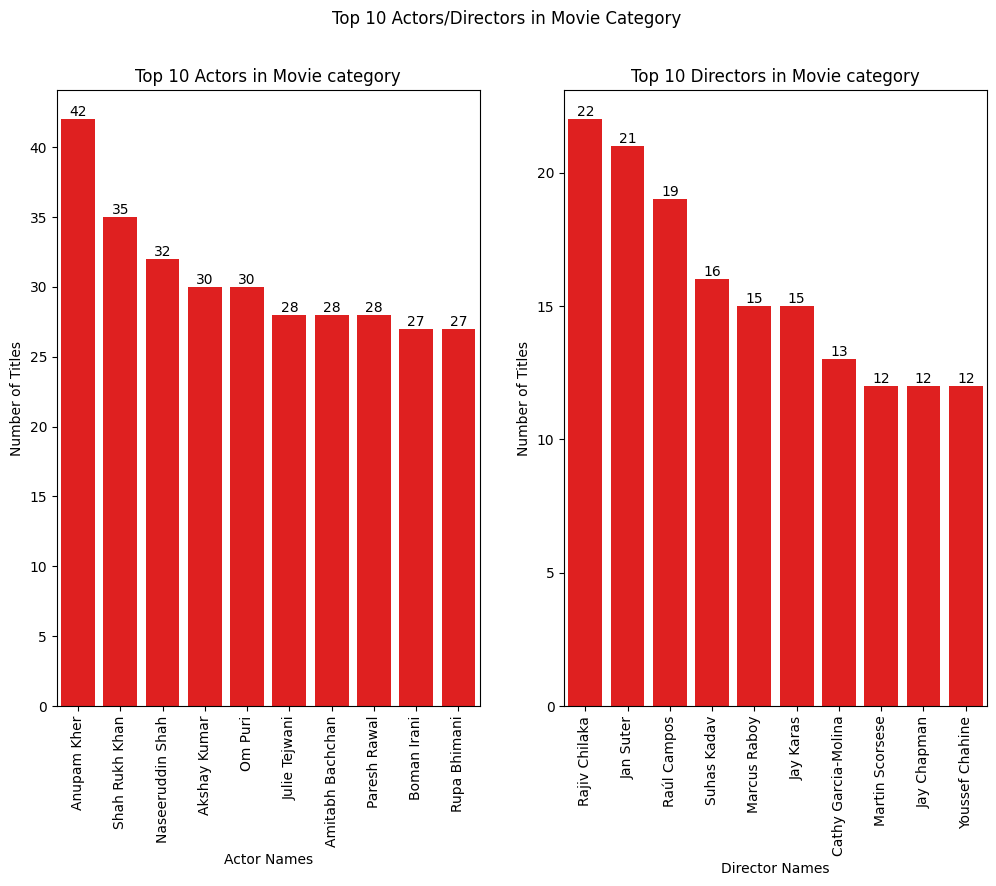

In [229]:
top_10_actors_movie=Movie.groupby(["cast"])["title"].nunique().sort_values(ascending=False)[1:11]
top_10_directors_movie=Movie.groupby(["director"])["title"].nunique().sort_values(ascending=False)[1:11]
plt.figure(figsize=(12, 8)).suptitle("Top 10 Actors/Directors in Movie Category")
plt.subplot(1,2,1)
bar_plot_h=sns.barplot(x=top_10_actors_movie.index, y=top_10_actors_movie.values,color="red")
plt.xlabel('Actor Names')
plt.ylabel('Number of Titles')
plt.xticks(rotation=90)
plt.title('Top 10 Actors in Movie category')
for index, value in enumerate(top_10_actors_movie.values):
   bar_plot_h.text(index, value, str(value), ha='center', va='bottom')
plt.subplot(1,2,2)
bar_plot_h=sns.barplot(x=top_10_directors_movie.index, y=top_10_directors_movie.values,color="red")
plt.xlabel('Director Names')
plt.ylabel('Number of Titles')
plt.xticks(rotation=90)
plt.title('Top 10 Directors in Movie category')
for index, value in enumerate(top_10_directors_movie.values):
  bar_plot_h.text(index, value, str(value), ha='center', va='bottom')
plt.show()

6.Top actor/director in TV show category


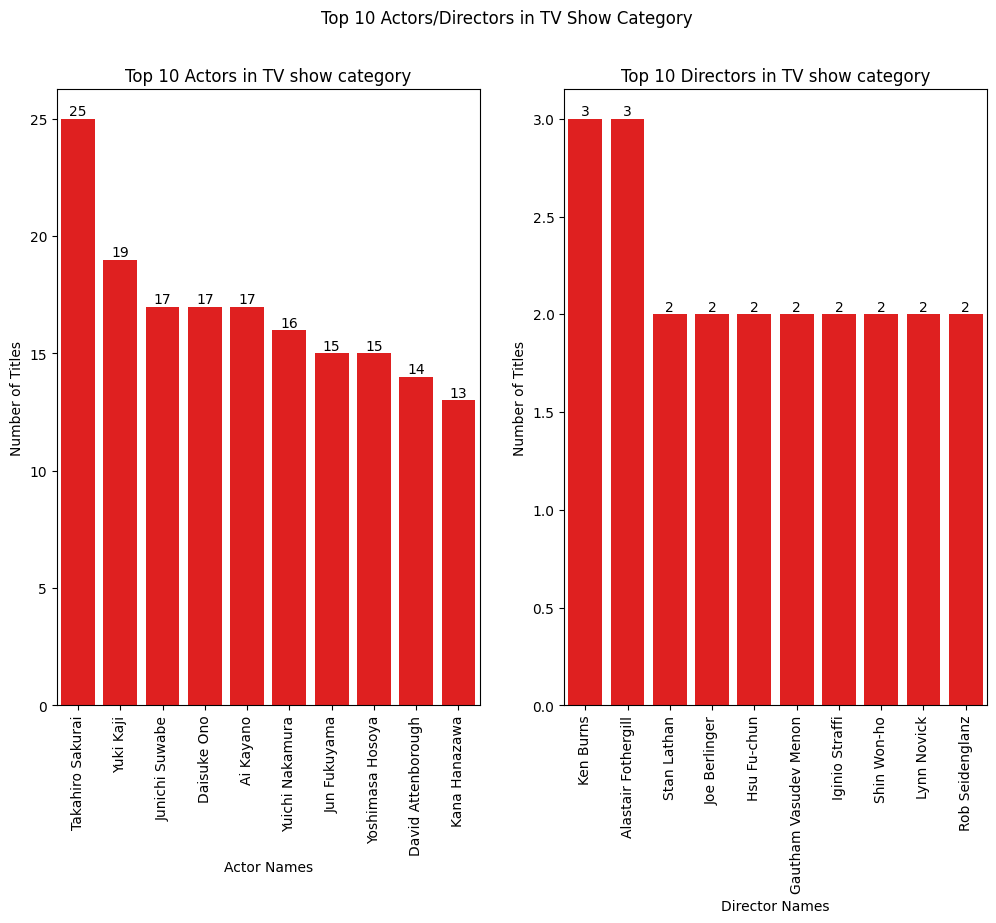

In [230]:
top_10_actors_Tvshow=TV_show.groupby(["cast"])["title"].nunique().sort_values(ascending=False)[1:11]
top_10_directors_Tvshow=TV_show.groupby(["director"])["title"].nunique().sort_values(ascending=False)[1:11]
plt.figure(figsize=(12, 8)).suptitle("Top 10 Actors/Directors in TV Show Category")
plt.subplot(1,2,1)
bar_plot_h=sns.barplot(x=top_10_actors_Tvshow.index, y=top_10_actors_Tvshow.values,color="red")
plt.xlabel('Actor Names')
plt.ylabel('Number of Titles')
plt.xticks(rotation=90)
plt.title('Top 10 Actors in TV show category')
for index, value in enumerate(top_10_actors_Tvshow.values):
  bar_plot_h.text(index, value, str(value), ha='center', va='bottom')
plt.subplot(1,2,2)
bar_plot_h=sns.barplot(x=top_10_directors_Tvshow.index,y=top_10_directors_Tvshow.values,color="red")
plt.xlabel('Director Names')
plt.ylabel('Number of Titles')
plt.xticks(rotation=90)
plt.title('Top 10 Directors in TV show category')
for index, value in enumerate(top_10_directors_Tvshow.values):
  bar_plot_h.text(index, value, str(value), ha='center', va='bottom')
plt.show()

The top actor in movie category is “Anupam Kher” and director “Rajiv Chilaka”.
The top actor in Tv show category is “Takahiro Sakurai” and director “Ken Burns” .

7.Top 10 Genres by Movies/TV shows

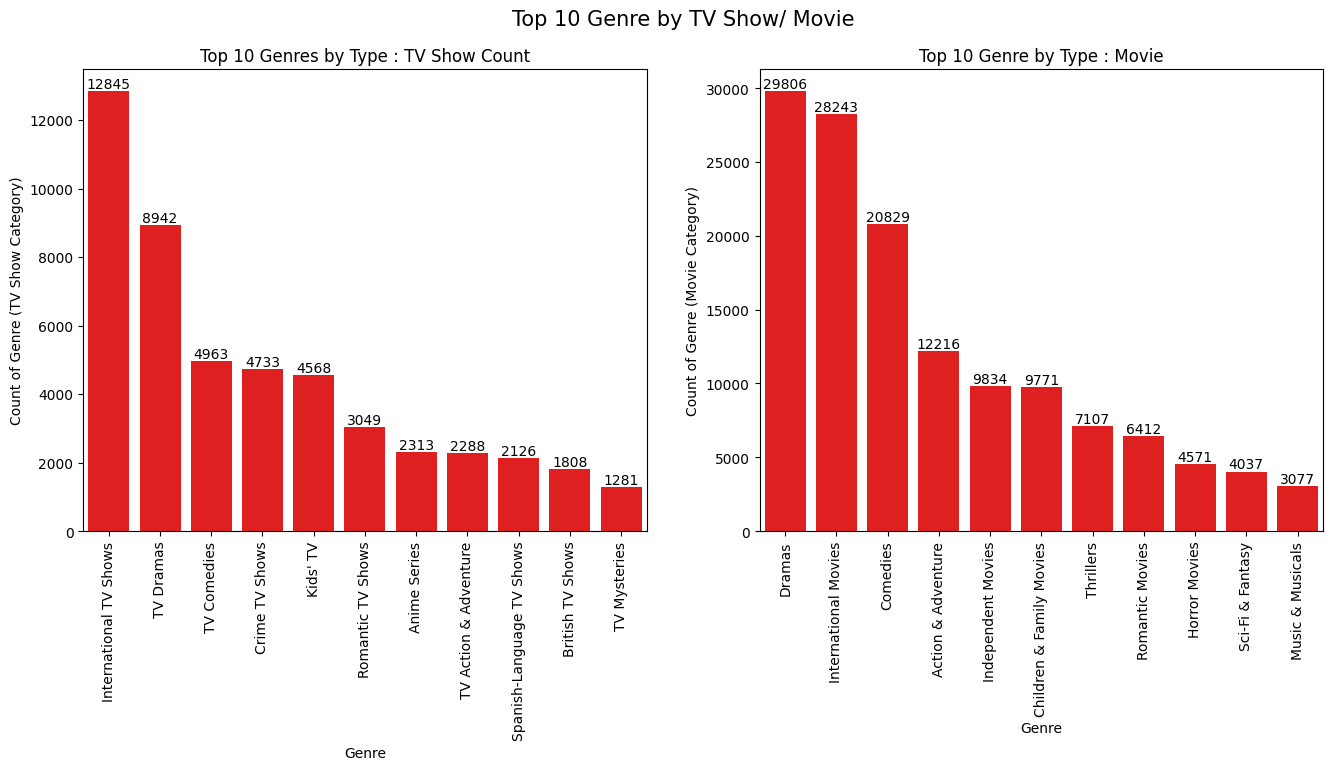

8.1

In [231]:
top_10_movie_genre=final_df.loc[final_df["type"]=="Movie"]["genre"].value_counts()[:11]
top_10_TVshow_genre=final_df.loc[final_df["type"]=="TV Show"]["genre"].value_counts()[:11]
plt.figure(figsize=(16, 6)).suptitle("Top 10 Genre by TV Show/ Movie",fontsize=15)
plt.subplot(1,2,1)
bar_plot = sns.barplot(x=top_10_TVshow_genre.index, y=top_10_TVshow_genre.values,color="red")
plt.xticks(rotation=90)
plt.xlabel('Genre')
plt.ylabel('Count of Genre (TV Show Category)')
plt.title('Top 10 Genres by Type : TV Show Count')
for index, value in enumerate(top_10_TVshow_genre.values):
 bar_plot.text(index, value,str(value), ha='center', va='bottom')
plt.subplot(1,2,2)
bar_plot = sns.barplot(x=top_10_movie_genre.index, y=top_10_movie_genre.values,color="red")
plt.xticks(rotation=90)
plt.xlabel('Genre')
plt.ylabel('Count of Genre (Movie Category)')
plt.title('Top 10 Genre by Type : Movie')
for index, value in enumerate(top_10_movie_genre.values):
  bar_plot.text(index, value,str(value), ha='center', va='bottom')
plt.show()
8.1

This analysis provides insights into viewer preferences
which is, "International Tv shows" in Tv show category and "Dramas" in movie category.

8.How has the number of movies released per year
changed over the last 20-30 years?

In [232]:
Movie["release_year"].min()

1942

In [233]:
Movie["release_year"].max()

2021

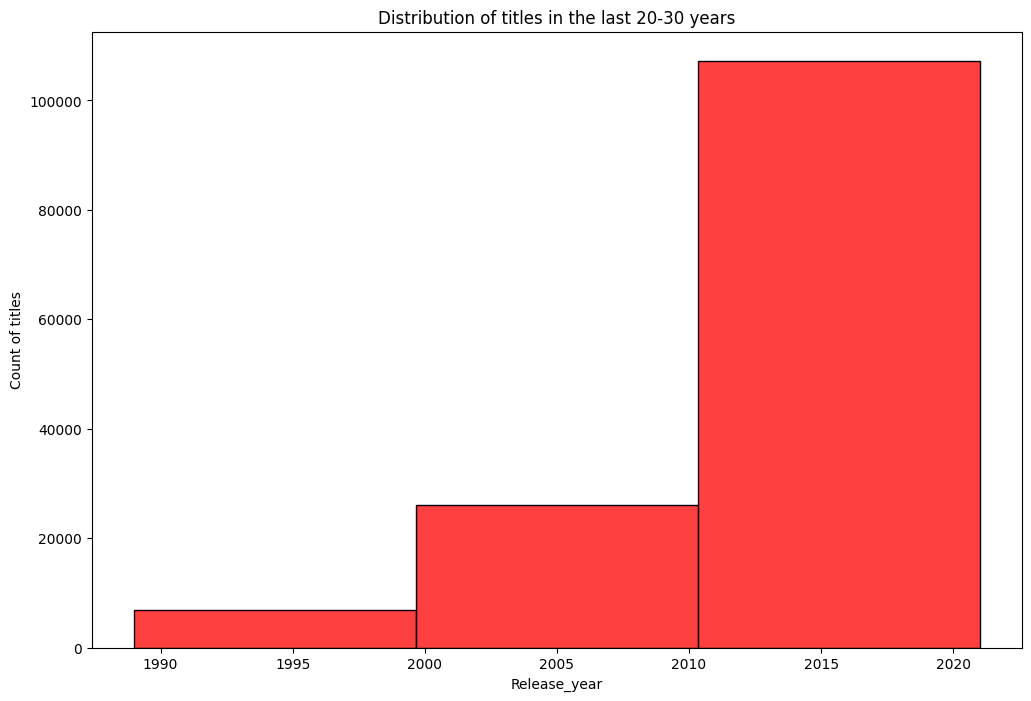

In [234]:
plt.figure(figsize=(12,8))
sns.histplot(Movie['release_year'],binrange=([1989,2021]),bins=3,color="red")
plt.xlabel('Release_year')
plt.ylabel('Count of titles')
plt.title('Distribution of titles in the last 20-30 years')
plt.show()

This analysis shows the quantum of movies added
in the last 20-30 years has increased to a great extent especially last 10 years.

9.Does Netflix has more focus on TV Shows than
movies in recent years

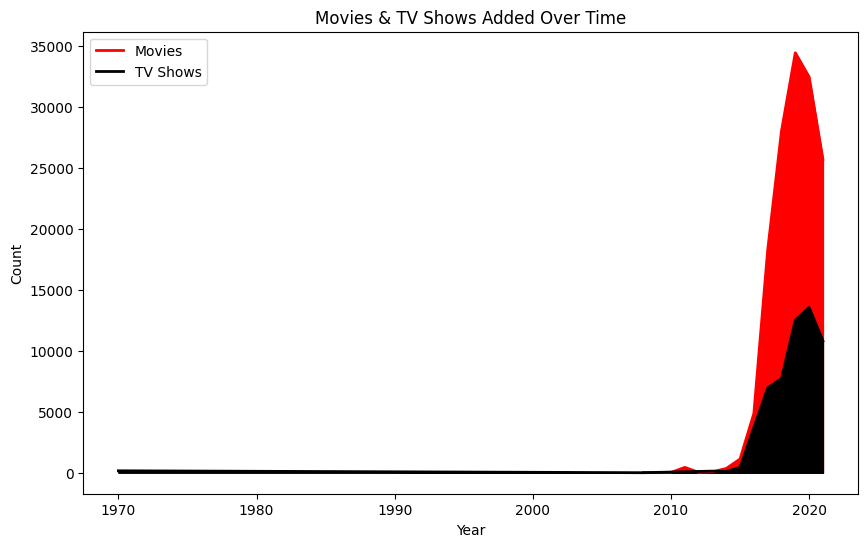

In [235]:
movies_count = Movie['year_added'].value_counts().sort_index()
tv_shows_count = TV_show['year_added'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
plt.plot(movies_count.index, movies_count.values, color='red',
label='Movies', linewidth=2)
plt.plot(tv_shows_count.index, tv_shows_count.values, color='black',
label='TV Shows', linewidth=2)
plt.fill_between(movies_count.index, movies_count.values, color='red')
plt.fill_between(tv_shows_count.index, tv_shows_count.values, color='black')
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Movies & TV Shows Added Over Time')
plt.legend()
plt.show()

This analysis clearly proves the fact that netflix
has added more movies than Tv shows. The jump seen in the visualization is more for movies in comparison to TV shows and it also tells us about the viewers preferences.

10.Distribution of Movie Lengths and TV Show Episode Counts.

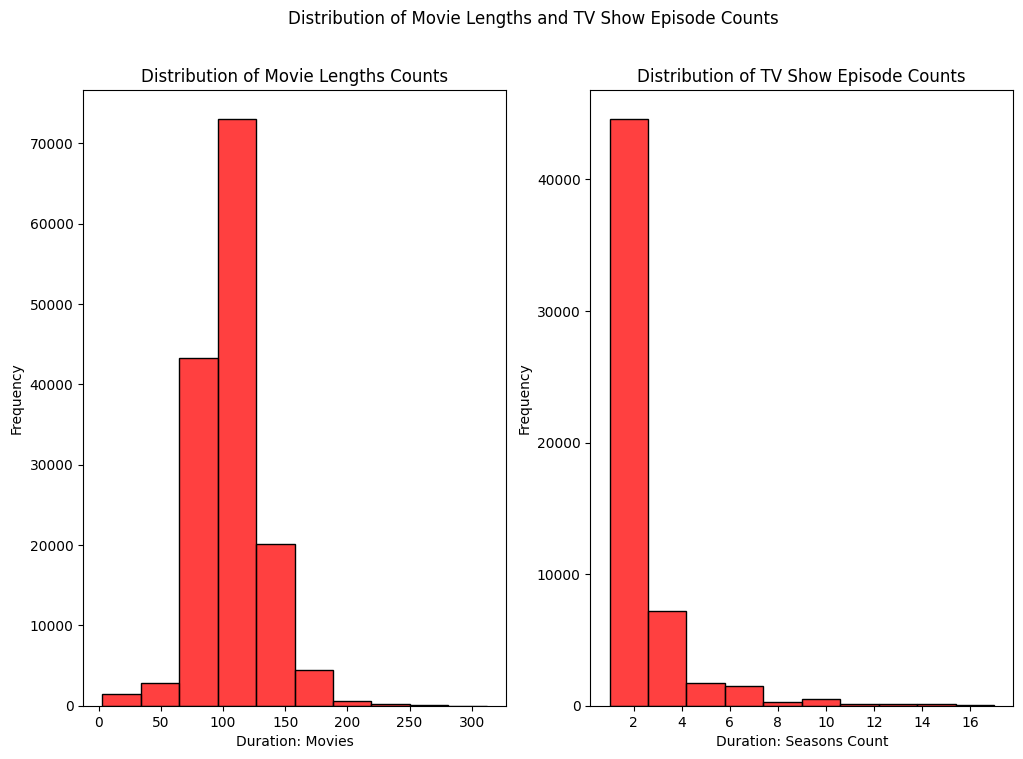

In [236]:
movie_lengths=Movie["duration"].str.extract("(\d+)",expand=False).astype(int)
#duration column is converted into int type
Tv_show_episodes = TV_show['duration'].str.extract("(\d+)", expand=False).astype(int)
plt.figure(figsize=(12,8)).suptitle("Distribution of Movie Lengths and TV Show Episode Counts")
plt.subplot(1,2,1)
sns.histplot(movie_lengths,bins=10,color="red")
plt.xlabel('Duration: Movies')
plt.ylabel('Frequency')
plt.title('Distribution of Movie Lengths Counts')
plt.subplot(1,2,2)
sns.histplot(Tv_show_episodes,bins=10,color="red")
plt.xlabel('Duration: Seasons Count')
plt.ylabel('Frequency')
plt.title('Distribution of TV Show Episode Counts')
plt.show()

In [237]:
TV_show['duration'] = TV_show['duration'].str.extract('(\d+)', expand=False).astype(int)
Movie['duration'] = Movie['duration'].str.extract('(\d+)', expand=False).astype(int)


<ipython-input-237-8c4d08ac7307>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TV_show['duration'] = TV_show['duration'].str.extract('(\d+)', expand=False).astype(int)
<ipython-input-237-8c4d08ac7307>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Movie['duration'] = Movie['duration'].str.extract('(\d+)', expand=False).astype(int)


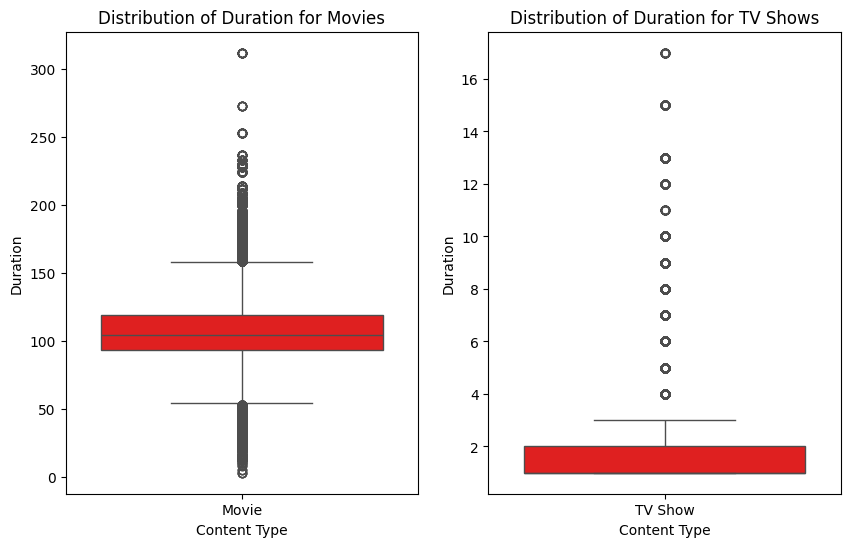

In [239]:
plt.figure(figsize=(10, 6))
plt.subplot(1,2,1)
sns.boxplot(data=Movie, x='type', y='duration',color="red")
plt.xlabel('Content Type')
plt.ylabel('Duration')
plt.title('Distribution of Duration for Movies')
plt.subplot(1,2,2)
sns.boxplot(data=TV_show, x='type', y='duration',color="red")
plt.xlabel('Content Type')
plt.ylabel('Duration')
plt.title('Distribution of Duration for TV Shows')
plt.show()

From the above mentioned histogram and box plot analysis it provides insights regarding the duration of movies/Tv shows which are added in the Netflix library.It provides a median value of duration which is 100 minutes approax,2 seasons in movie and TV show category respectively. There are also some movies and Tv shows durations which are acting as an outliers in the box plot.

11.Understanding what content is available in different countries

In [241]:
Country_content_wise=Movie.groupby(["country"])["genre"].value_counts().sort_values(ascending=False)
Country_content_wise=pd.DataFrame(Country_content_wise)
Country_content_wise

genre
country       genre                          
United States Comedies                   9171
              Dramas                     9131
India         International Movies       7059
United States Children & Family Movies   5665
India         Dramas                     5569
...                                       ...
Georgia       Documentaries                 1
Switzerland   Faith & Spirituality          1
Iceland       Stand-Up Comedy               1
Germany       Faith & Spirituality          1
Slovenia      Comedies                      1

[896 rows x 1 columns]

In [242]:
Country_content_wise_TV=TV_show.groupby(["country"])["genre"].value_counts().sort_values(ascending=False)
Country_content_wise_TV=pd.DataFrame(Country_content_wise_TV)
Country_content_wise_TV


genre
country        genre                        
United States  TV Dramas                3429
               TV Comedies              2711
               International TV Shows   2268
               Kids' TV                 2258
Japan          International TV Shows   1809
...                                      ...
Czech Republic British TV Shows            1
Norway         Docuseries                  1
               Science & Nature TV         1
Greece         Science & Nature TV         1
Thailand       Docuseries                  1

[519 rows x 1 columns]

Above analysis provides the number of contents available in Movie and Tv show category separately. It aslo provides the insight regarding the favourability of contents among viewers in different categories.

# Recommendations

  As the streaming industry evolves, understanding these patterns and trends becomes increasingly essential for navigating the dynamic landscape of Netflix and its vast library.Following are some of the recommendations,

*   It should build relationships with other providers
preferably the multinational television providers such as “HBO” in order to increase the selection streaming titles
*   This will ultimately lead to attracting more customers and therfore increase in market share.


*   It would help in lowering the churn rate and help expand their customer base
*   Continue to produce high-quality original content. This is Netflix's biggest strength, and it's what has kept subscribers coming back for more. Netflix needs to keep investing in original content that is both critically acclaimed and popular with viewers


*   Offer more affordable subscription plans. Netflix's current subscription plans are relatively expensive, especially compared to some of its competitors. Netflix could offer more affordable subscription plans, such as a plan with limited ads, to attract more subscribers








  



In [243]:
pip install notebook-as-pdf

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.4/83.4 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.8/143.8 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 9.0 MB/s eta 0:00:00
  Attempting uninstall: urllib3
    Found existing installation: urllib3 2.0.7
    Uninstalling urllib3-2.0.7:
      Successfully uninstalled urllib3-2.0.7
